# Analisis smartphone Indian Market

In [2]:
from google.colab import files
uploaded = files.upload()

Saving smartphones_data.csv to smartphones_data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("smartphones_data.csv")
df.head()


,brand_name,Name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,has_5g,processor_brand,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types
0,vivo,vivo v50,34999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,50.0,1,6.77,120.0,amoled display
1,realme,realme p3 pro,21999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.83,120.0,amoled display
2,realme,realme 14 pro plus,27999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,3,32.0,1,6.83,120.0,oled display
3,samsung,samsung galaxy s25 ultra,129999,12.0,android,256.0,5000,Yes,Yes,Yes,Yes,snapdragon,8.0,200.0,4,12.0,1,6.90,120.0,amoled display
4,vivo,vivo t3 pro,22999,8.0,android,128.0,5500,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.77,120.0,amoled display


In [5]:
# How big is the data
df.shape


(3260, 20)

# Data Understanding

In [6]:
# Cek tipe data dan missing values
print("\n📊 Info dataset:")
df.info()


📊 Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            3260 non-null   object 
 1   Name                  3260 non-null   object 
 2   Price                 3260 non-null   int64  
 3   RAM                   3260 non-null   float64
 4   OS                    3260 non-null   object 
 5   storage               3260 non-null   float64
 6   Battery_cap           3260 non-null   int64  
 7   has_fast_charging     3260 non-null   object 
 8   has_fingerprints      2534 non-null   object 
 9   has_nfc               2534 non-null   object 
 10  has_5g                2534 non-null   object 
 11  processor_brand       3260 non-null   object 
 12  num_core              3085 non-null   float64
 13  primery_rear_camera   3260 non-null   float64
 14  Num_Rear_Cameras      3260 non-null   int64  
 15  prim

In [7]:
# Are there any missing values
df.isnull().sum()

,0
brand_name,0
Name,0
Price,0
RAM,0
OS,0
storage,0
Battery_cap,0
has_fast_charging,0
has_fingerprints,726
has_nfc,726


In [8]:
# Persentase missing value
(df.isnull().mean() * 100).round(2)

,0
brand_name,0.00
Name,0.00
Price,0.00
RAM,0.00
OS,0.00
storage,0.00
Battery_cap,0.00
has_fast_charging,0.00
has_fingerprints,22.27
has_nfc,22.27


In [9]:
# Misalnya kita punya kolom 'brand' dan 'model'
for col in df.select_dtypes(include='object').columns:
    print(f"\n=== {col.upper()} ===")
    print(df[col].value_counts().head(10))


=== BRAND_NAME ===
brand_name
samsung    315
realme     302
Other      287
xiaomi     244
vivo       233
oppo       174
apple      120
tecno      119
lava       117
infinix    100
Name: count, dtype: int64

=== NAME ===
Name
black bear b6 glory         1
vivo v50                    1
realme p3 pro               1
realme 14 pro plus          1
samsung galaxy s25 ultra    1
vivo t3 pro                 1
motorola edge 50 fusion     1
moto g85                    1
oneplus 13r                 1
poco x7 pro                 1
Name: count, dtype: int64

=== OS ===
OS
android    3130
ios         120
other        10
Name: count, dtype: int64

=== HAS_FAST_CHARGING ===
has_fast_charging
No     1717
Yes    1543
Name: count, dtype: int64

=== HAS_FINGERPRINTS ===
has_fingerprints
Yes    2391
No      143
Name: count, dtype: int64

=== HAS_NFC ===
has_nfc
No     1699
Yes     835
Name: count, dtype: int64

=== HAS_5G ===
has_5g
No     1531
Yes    1003
Name: count, dtype: int64

=== PROCESSOR_BRAND ==

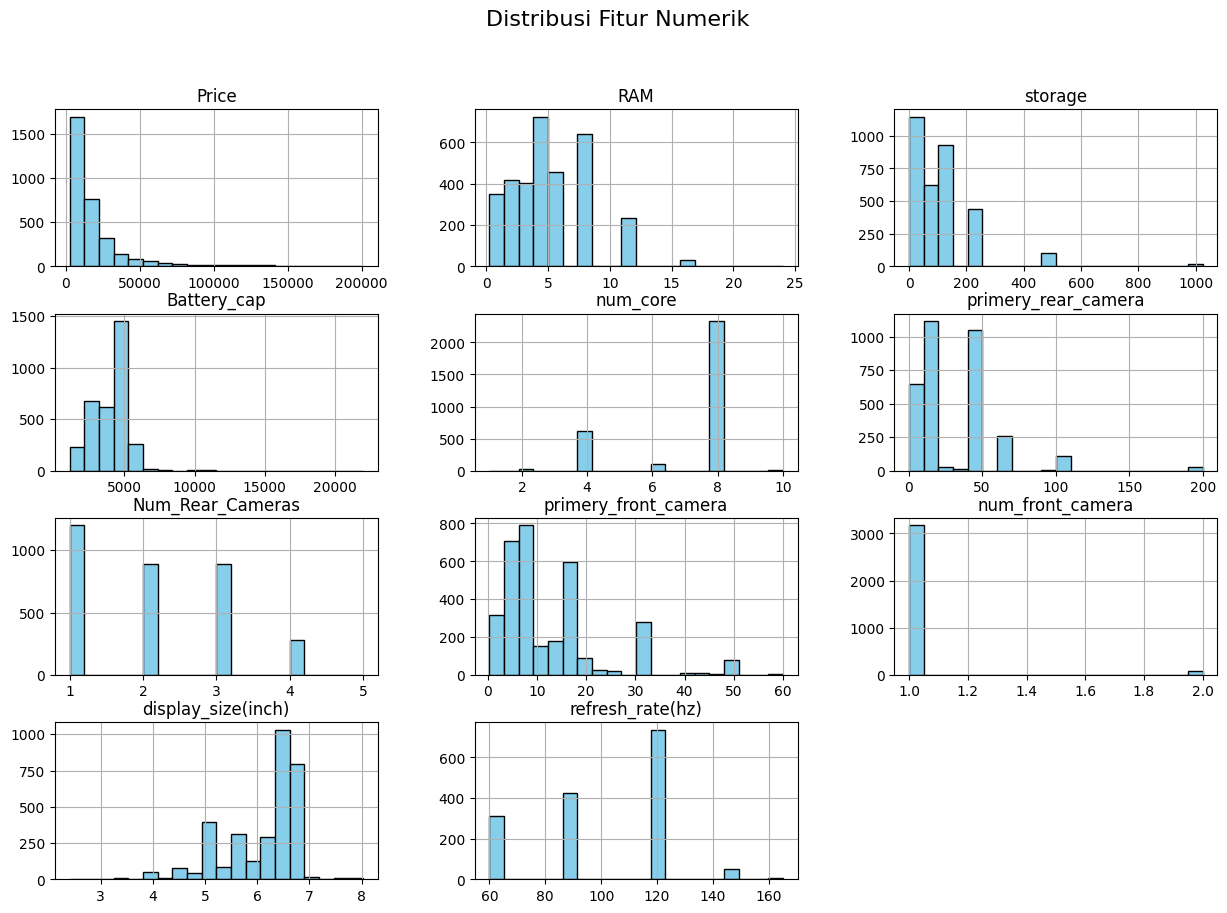

In [10]:
# Distribusi setiap kolom numerik
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()

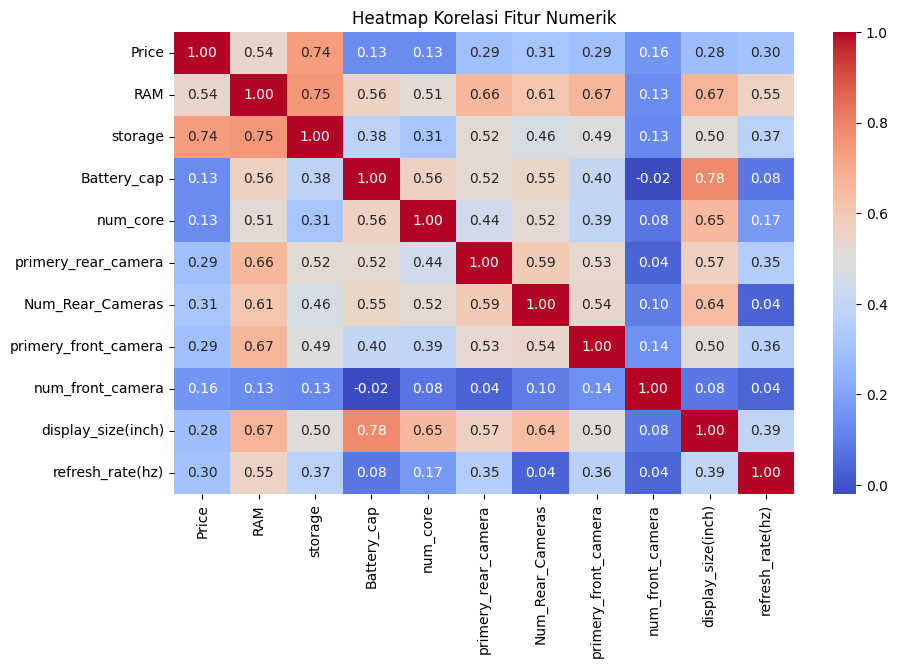

In [11]:
# Heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()


In [12]:
# how does data look mathematically
df.describe(include='all')


,brand_name,Name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,has_5g,processor_brand,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types
count,3260,3260,3260.000000,3260.000000,3260,3260.000000,3260.000000,3260,2534,2534,2534,3260,3085.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,1529.000000,3260
unique,33,3260,NaN,NaN,3,NaN,NaN,2,2,2,2,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,samsung,black bear b6 glory,NaN,NaN,android,NaN,NaN,No,Yes,No,No,mediatek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcd display
freq,315,1,NaN,NaN,3130,NaN,NaN,1717,2391,1699,1531,1384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
mean,NaN,NaN,20181.384356,5.065874,NaN,112.040893,4163.485583,NaN,NaN,NaN,NaN,NaN,7.089141,32.655828,2.076994,12.555767,1.026994,6.097110,100.375409,NaN
std,NaN,NaN,24145.388368,3.256896,NaN,126.893532,1312.404904,NaN,NaN,NaN,NaN,NaN,1.682527,29.397695,0.990856,10.564795,0.162090,0.741478,24.920299,NaN
min,NaN,NaN,2500.000000,0.250000,NaN,0.310000,1100.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.300000,1.000000,0.300000,1.000000,2.400000,60.000000,NaN
25%,NaN,NaN,7490.000000,3.000000,NaN,32.000000,3007.500000,NaN,NaN,NaN,NaN,NaN,8.000000,12.000000,1.000000,5.000000,1.000000,5.500000,90.000000,NaN
50%,NaN,NaN,11999.000000,4.000000,NaN,64.000000,4500.000000,NaN,NaN,NaN,NaN,NaN,8.000000,16.000000,2.000000,8.000000,1.000000,6.455000,120.000000,NaN
75%,NaN,NaN,21999.000000,8.000000,NaN,128.000000,5000.000000,NaN,NaN,NaN,NaN,NaN,8.000000,50.000000,3.000000,16.000000,1.000000,6.670000,120.000000,NaN


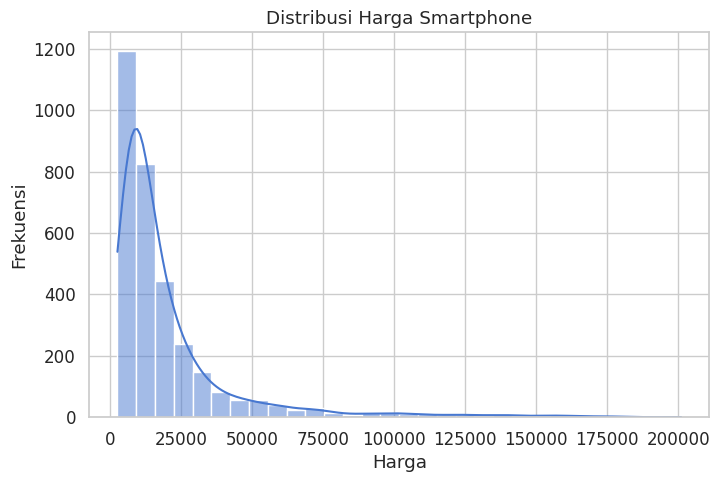

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# --- 1️⃣ Histogram: Distribusi Harga Smartphone ---
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Smartphone')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

# Alasan:
# Histogram dipilih karena dapat memperlihatkan sebaran harga smartphone.
# Ini penting untuk mengetahui apakah data condong ke ponsel low-end, mid-range, atau high-end.
# Insight:
# Jika distribusi miring ke kanan → lebih banyak ponsel murah, sedikit ponsel mahal.

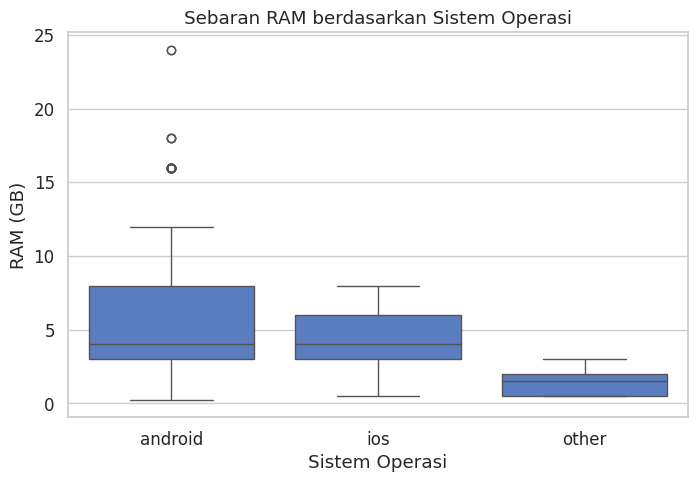

In [14]:
# --- 2️⃣ Boxplot: Sebaran RAM berdasarkan Sistem Operasi ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='OS', y='RAM', data=df)
plt.title('Sebaran RAM berdasarkan Sistem Operasi')
plt.xlabel('Sistem Operasi')
plt.ylabel('RAM (GB)')
plt.show()

# Alasan:
# Boxplot membantu melihat variasi RAM antar sistem operasi (Android vs iOS misalnya)
# dan mendeteksi outlier atau perbedaan signifikan antar kategori.
# Insight:
# Misalnya iOS cenderung RAM kecil tapi stabil, sedangkan Android lebih beragam.


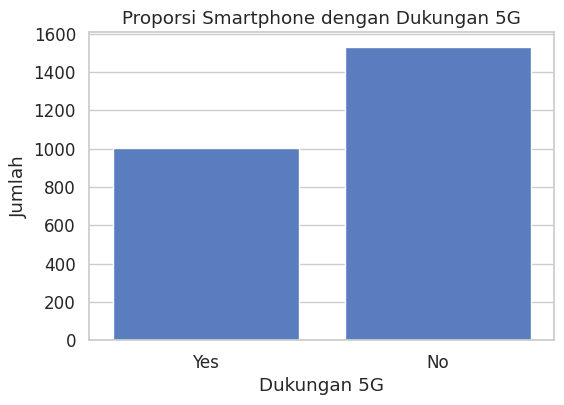

In [15]:
# --- 3️⃣ Bar Chart: Proporsi Smartphone dengan 5G ---
plt.figure(figsize=(6, 4))
sns.countplot(x='has_5g', data=df)
plt.title('Proporsi Smartphone dengan Dukungan 5G')
plt.xlabel('Dukungan 5G')
plt.ylabel('Jumlah')
plt.show()

# Alasan:
# Bar chart cocok untuk data kategorikal seperti fitur "Ya/Tidak".
# Insight:
# Dari proporsinya kita tahu apakah mayoritas ponsel dalam dataset sudah 5G atau belum.

# ***DATA CLEANING***

In [16]:
# Cek ulang jumlah missing value per kolom
missing_values = df.isnull().sum()
print("Missing values per kolom:\n", missing_values[missing_values > 0])

Missing values per kolom:
 has_fingerprints     726
has_nfc              726
has_5g               726
num_core             175
refresh_rate(hz)    1731
dtype: int64


<Axes: xlabel='num_core'>

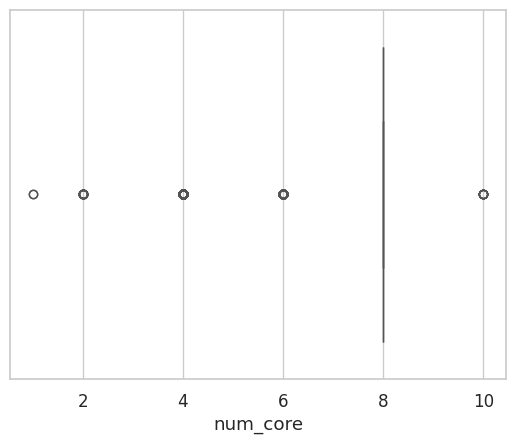

In [17]:
import seaborn as sns
sns.boxplot(x=df['num_core'])

kami melakukan penanganan pada num_core yang total mising valuenya itu dibawah 5%

Hilang < 5% = Isi dengan mean/modus/median

kenapa kami milih modus karena
kami sudah cek datany tidak ada outlier (bila ada outlier kami akan pakai median)

*   Mean bisa menghasilkan pecahan (tidak logis untuk jumlah core)
*   Median akan sama dengan mode (karena 8 paling banyak)
*   Modus menjaga data tetap realistis sesuai domain (octa-core paling umum)

In [18]:
df['num_core'] = df['num_core'].fillna(df['num_core'].mode()[0])


In [19]:
df

,brand_name,Name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,has_5g,processor_brand,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types
0,vivo,vivo v50,34999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,50.0,1,6.770,120.0,amoled display
1,realme,realme p3 pro,21999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.830,120.0,amoled display
2,realme,realme 14 pro plus,27999,8.0,android,128.0,6000,Yes,Yes,No,Yes,snapdragon,8.0,50.0,3,32.0,1,6.830,120.0,oled display
3,samsung,samsung galaxy s25 ultra,129999,12.0,android,256.0,5000,Yes,Yes,Yes,Yes,snapdragon,8.0,200.0,4,12.0,1,6.900,120.0,amoled display
4,vivo,vivo t3 pro,22999,8.0,android,128.0,5500,Yes,Yes,No,Yes,snapdragon,8.0,50.0,2,16.0,1,6.770,120.0,amoled display
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,ikall,i kall k570,4799,4.0,android,64.0,4000,No,Yes,No,No,tru-mediatek,8.0,13.0,1,8.0,1,6.500,NaN,lcd display
3256,Other,mafe z2,5299,2.0,android,16.0,3300,No,Yes,No,No,quad,4.0,5.0,1,5.0,1,5.340,NaN,lcd display
3257,Other,mafe v9,5599,2.0,android,16.0,3500,No,NaN,NaN,NaN,quad,4.0,5.0,1,5.0,1,5.700,NaN,lcd display
3258,Other,marq m3 smart,6499,2.0,android,32.0,5000,No,NaN,NaN,NaN,tru-mediatek,8.0,13.0,1,5.0,1,6.088,NaN,lcd display


In [20]:
(df.isnull().mean() * 100).round(2)


,0
brand_name,0.00
Name,0.00
Price,0.00
RAM,0.00
OS,0.00
storage,0.00
Battery_cap,0.00
has_fast_charging,0.00
has_fingerprints,22.27
has_nfc,22.27


In [21]:
df[['has_fingerprints', 'has_nfc', 'has_5g']].isna().mean() * 100

,0
has_fingerprints,22.269939
has_nfc,22.269939
has_5g,22.269939


In [22]:
for col in ['has_fingerprints', 'has_nfc', 'has_5g']:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(normalize=True) * 100)


has_fingerprints value counts:
has_fingerprints
Yes    94.356748
No      5.643252
Name: proportion, dtype: float64

has_nfc value counts:
has_nfc
No     67.048145
Yes    32.951855
Name: proportion, dtype: float64

has_5g value counts:
has_5g
No     60.418311
Yes    39.581689
Name: proportion, dtype: float64


has_nfc
kami isi dengan **YES** karena sangat logis kalau nilai kosong diisi dengan "Yes", karena probabilitas besar memang begitu.

In [23]:
df['has_fingerprints'] = df['has_fingerprints'].fillna('Yes')


has_nfc tidak bisa langsung kami isi dengan NO karena 32 masih sangan signifikan untuk diisi, jadi kami lakukan pendekatan dengan cara melihat pendekatan(korelasi dengan kolom lain) misaln ya

In [24]:
# Encode kolom Yes/No menjadi 1/0
cols_to_encode = ['has_fingerprints', 'has_nfc', 'has_5g']
df[cols_to_encode] = df[cols_to_encode].replace({'Yes': 1, 'No': 0})
df = df.infer_objects(copy=False)
df[cols_to_encode].head()

/tmp/ipython-input-2747241906.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_to_encode] = df[cols_to_encode].replace({'Yes': 1, 'No': 0})


,has_fingerprints,has_nfc,has_5g
0,1,0.0,1.0
1,1,0.0,1.0
2,1,0.0,1.0
3,1,1.0,1.0
4,1,0.0,1.0


In [25]:
corr_matrix = df.corr(numeric_only=True)

# Korelasi terhadap has_5g
print("Korelasi terhadap has_5g:")
print(corr_matrix['has_5g'].sort_values(ascending=False))

# Korelasi terhadap has_nfc
print("\nKorelasi terhadap has_nfc:")
print(corr_matrix['has_nfc'].sort_values(ascending=False))

Korelasi terhadap has_5g:
has_5g                  1.000000
RAM                     0.641724
refresh_rate(hz)        0.620941
storage                 0.531113
primery_rear_camera     0.520036
display_size(inch)      0.438399
primery_front_camera    0.392582
Price                   0.390545
has_nfc                 0.332195
Battery_cap             0.279225
Num_Rear_Cameras        0.259996
num_core                0.221703
num_front_camera       -0.010136
has_fingerprints       -0.039861
Name: has_5g, dtype: float64

Korelasi terhadap has_nfc:
has_nfc                 1.000000
Price                   0.576627
storage                 0.406017
RAM                     0.375165
has_5g                  0.332195
refresh_rate(hz)        0.312011
primery_front_camera    0.211407
primery_rear_camera     0.132768
Num_Rear_Cameras        0.095058
num_front_camera        0.039020
num_core               -0.010895
display_size(inch)     -0.032287
Battery_cap            -0.066282
has_fingerprints       -0.

In [26]:
cond_5g = (df['RAM'] >= df['RAM'].median()) & (df['refresh_rate(hz)'] >= df['refresh_rate(hz)'].median())
df.loc[cond_5g & (df['has_5g'].isna()), 'has_5g'] = 1
df['has_5g'] = df['has_5g'].fillna(0)

In [27]:
cond_nfc = (df['Price'] >= df['Price'].median()) & (df['storage'] >= df['storage'].median())
df.loc[cond_nfc & (df['has_nfc'].isna()), 'has_nfc'] = 1
df['has_nfc']=  df['has_nfc'].fillna(0)

In [28]:
df

,brand_name,Name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,has_5g,processor_brand,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types
0,vivo,vivo v50,34999,8.0,android,128.0,6000,Yes,1,0.0,1.0,snapdragon,8.0,50.0,2,50.0,1,6.770,120.0,amoled display
1,realme,realme p3 pro,21999,8.0,android,128.0,6000,Yes,1,0.0,1.0,snapdragon,8.0,50.0,2,16.0,1,6.830,120.0,amoled display
2,realme,realme 14 pro plus,27999,8.0,android,128.0,6000,Yes,1,0.0,1.0,snapdragon,8.0,50.0,3,32.0,1,6.830,120.0,oled display
3,samsung,samsung galaxy s25 ultra,129999,12.0,android,256.0,5000,Yes,1,1.0,1.0,snapdragon,8.0,200.0,4,12.0,1,6.900,120.0,amoled display
4,vivo,vivo t3 pro,22999,8.0,android,128.0,5500,Yes,1,0.0,1.0,snapdragon,8.0,50.0,2,16.0,1,6.770,120.0,amoled display
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,ikall,i kall k570,4799,4.0,android,64.0,4000,No,1,0.0,0.0,tru-mediatek,8.0,13.0,1,8.0,1,6.500,NaN,lcd display
3256,Other,mafe z2,5299,2.0,android,16.0,3300,No,1,0.0,0.0,quad,4.0,5.0,1,5.0,1,5.340,NaN,lcd display
3257,Other,mafe v9,5599,2.0,android,16.0,3500,No,1,0.0,0.0,quad,4.0,5.0,1,5.0,1,5.700,NaN,lcd display
3258,Other,marq m3 smart,6499,2.0,android,32.0,5000,No,1,0.0,0.0,tru-mediatek,8.0,13.0,1,5.0,1,6.088,NaN,lcd display


In [29]:
df['refresh_rate(hz)'].value_counts().sort_index()

,count
refresh_rate(hz),
60.0,310
90.0,427
120.0,737
144.0,51
165.0,4


In [30]:
df['price_class'] = pd.qcut(df['Price'], q=3, labels=['low', 'mid', 'high'])

In [31]:
df

,brand_name,Name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,...,processor_brand,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types,price_class
0,vivo,vivo v50,34999,8.0,android,128.0,6000,Yes,1,0.0,...,snapdragon,8.0,50.0,2,50.0,1,6.770,120.0,amoled display,high
1,realme,realme p3 pro,21999,8.0,android,128.0,6000,Yes,1,0.0,...,snapdragon,8.0,50.0,2,16.0,1,6.830,120.0,amoled display,high
2,realme,realme 14 pro plus,27999,8.0,android,128.0,6000,Yes,1,0.0,...,snapdragon,8.0,50.0,3,32.0,1,6.830,120.0,oled display,high
3,samsung,samsung galaxy s25 ultra,129999,12.0,android,256.0,5000,Yes,1,1.0,...,snapdragon,8.0,200.0,4,12.0,1,6.900,120.0,amoled display,high
4,vivo,vivo t3 pro,22999,8.0,android,128.0,5500,Yes,1,0.0,...,snapdragon,8.0,50.0,2,16.0,1,6.770,120.0,amoled display,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,ikall,i kall k570,4799,4.0,android,64.0,4000,No,1,0.0,...,tru-mediatek,8.0,13.0,1,8.0,1,6.500,NaN,lcd display,low
3256,Other,mafe z2,5299,2.0,android,16.0,3300,No,1,0.0,...,quad,4.0,5.0,1,5.0,1,5.340,NaN,lcd display,low
3257,Other,mafe v9,5599,2.0,android,16.0,3500,No,1,0.0,...,quad,4.0,5.0,1,5.0,1,5.700,NaN,lcd display,low
3258,Other,marq m3 smart,6499,2.0,android,32.0,5000,No,1,0.0,...,tru-mediatek,8.0,13.0,1,5.0,1,6.088,NaN,lcd display,low


In [32]:
df['refresh_rate(hz)'] = df.groupby('price_class', observed=True)['refresh_rate(hz)'].transform(
    lambda x: x.fillna(x.median())
)

In [33]:
df


,brand_name,Name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,...,processor_brand,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types,price_class
0,vivo,vivo v50,34999,8.0,android,128.0,6000,Yes,1,0.0,...,snapdragon,8.0,50.0,2,50.0,1,6.770,120.0,amoled display,high
1,realme,realme p3 pro,21999,8.0,android,128.0,6000,Yes,1,0.0,...,snapdragon,8.0,50.0,2,16.0,1,6.830,120.0,amoled display,high
2,realme,realme 14 pro plus,27999,8.0,android,128.0,6000,Yes,1,0.0,...,snapdragon,8.0,50.0,3,32.0,1,6.830,120.0,oled display,high
3,samsung,samsung galaxy s25 ultra,129999,12.0,android,256.0,5000,Yes,1,1.0,...,snapdragon,8.0,200.0,4,12.0,1,6.900,120.0,amoled display,high
4,vivo,vivo t3 pro,22999,8.0,android,128.0,5500,Yes,1,0.0,...,snapdragon,8.0,50.0,2,16.0,1,6.770,120.0,amoled display,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,ikall,i kall k570,4799,4.0,android,64.0,4000,No,1,0.0,...,tru-mediatek,8.0,13.0,1,8.0,1,6.500,60.0,lcd display,low
3256,Other,mafe z2,5299,2.0,android,16.0,3300,No,1,0.0,...,quad,4.0,5.0,1,5.0,1,5.340,60.0,lcd display,low
3257,Other,mafe v9,5599,2.0,android,16.0,3500,No,1,0.0,...,quad,4.0,5.0,1,5.0,1,5.700,60.0,lcd display,low
3258,Other,marq m3 smart,6499,2.0,android,32.0,5000,No,1,0.0,...,tru-mediatek,8.0,13.0,1,5.0,1,6.088,60.0,lcd display,low


In [34]:
pd.set_option('display.max_rows', None)
(df.isnull().mean() * 100).round(2)

,0
brand_name,0.0
Name,0.0
Price,0.0
RAM,0.0
OS,0.0
storage,0.0
Battery_cap,0.0
has_fast_charging,0.0
has_fingerprints,0.0
has_nfc,0.0


# Melakukan encode pada kolom kategorikal:
saya memakai onehot encoding karena kolom kategorikal saya buakan bersifat ordinal atau ada urutan logis
Misalnya:

“Samsung” bukan berarti lebih tinggi nilainya dari “Vivo”.

“Android” bukan berarti lebih kecil dari “iOS”.

Kalau kami pakai Label Encoding, model akan menganggap “Samsung (1)” < “Vivo (2)” < “Oppo (3)” secara numerik — padahal itu salah makna.

In [35]:
df = pd.get_dummies(df, columns=['brand_name', 'OS', 'processor_brand', 'display_types'])


In [36]:
print(df.columns)

Index(['Name', 'Price', 'RAM', 'storage', 'Battery_cap', 'has_fast_charging',
       'has_fingerprints', 'has_nfc', 'has_5g', 'num_core',
       'primery_rear_camera', 'Num_Rear_Cameras', 'primery_front_camera',
       'num_front_camera', 'display_size(inch)', 'refresh_rate(hz)',
       'price_class', 'brand_name_Other', 'brand_name_apple',
       'brand_name_asus', 'brand_name_coolpad', 'brand_name_gionee',
       'brand_name_google', 'brand_name_honor', 'brand_name_htc',
       'brand_name_ikall', 'brand_name_infinix', 'brand_name_intex',
       'brand_name_iqoo', 'brand_name_itel', 'brand_name_karbonn',
       'brand_name_lava', 'brand_name_lenovo', 'brand_name_lg',
       'brand_name_lyf', 'brand_name_micromax', 'brand_name_moto',
       'brand_name_motorola', 'brand_name_nokia', 'brand_name_oneplus',
       'brand_name_oppo', 'brand_name_panasonic', 'brand_name_poco',
       'brand_name_realme', 'brand_name_samsung', 'brand_name_sony',
       'brand_name_tecno', 'brand_name_vivo',

In [37]:
#cek distribusi data untuk menentukan metode penanganan outlier (normal atau tidak noermal)

import pandas as pd

# Pilih hanya kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Buat dictionary untuk menyimpan hasil jumlah outlier
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Tampilkan hasil dalam bentuk DataFrame biar rapi
outlier_summary = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Jumlah Outlier'])
outlier_summary = outlier_summary.sort_values(by='Jumlah Outlier', ascending=False)

print(outlier_summary)


                      Jumlah Outlier
num_core                         753
Price                            318
has_fingerprints                 143
primery_rear_camera              135
storage                          119
primery_front_camera             107
num_front_camera                  88
RAM                               36
Battery_cap                       19
display_size(inch)                12
has_nfc                            0
has_5g                             0
Num_Rear_Cameras                   0
refresh_rate(hz)                   0


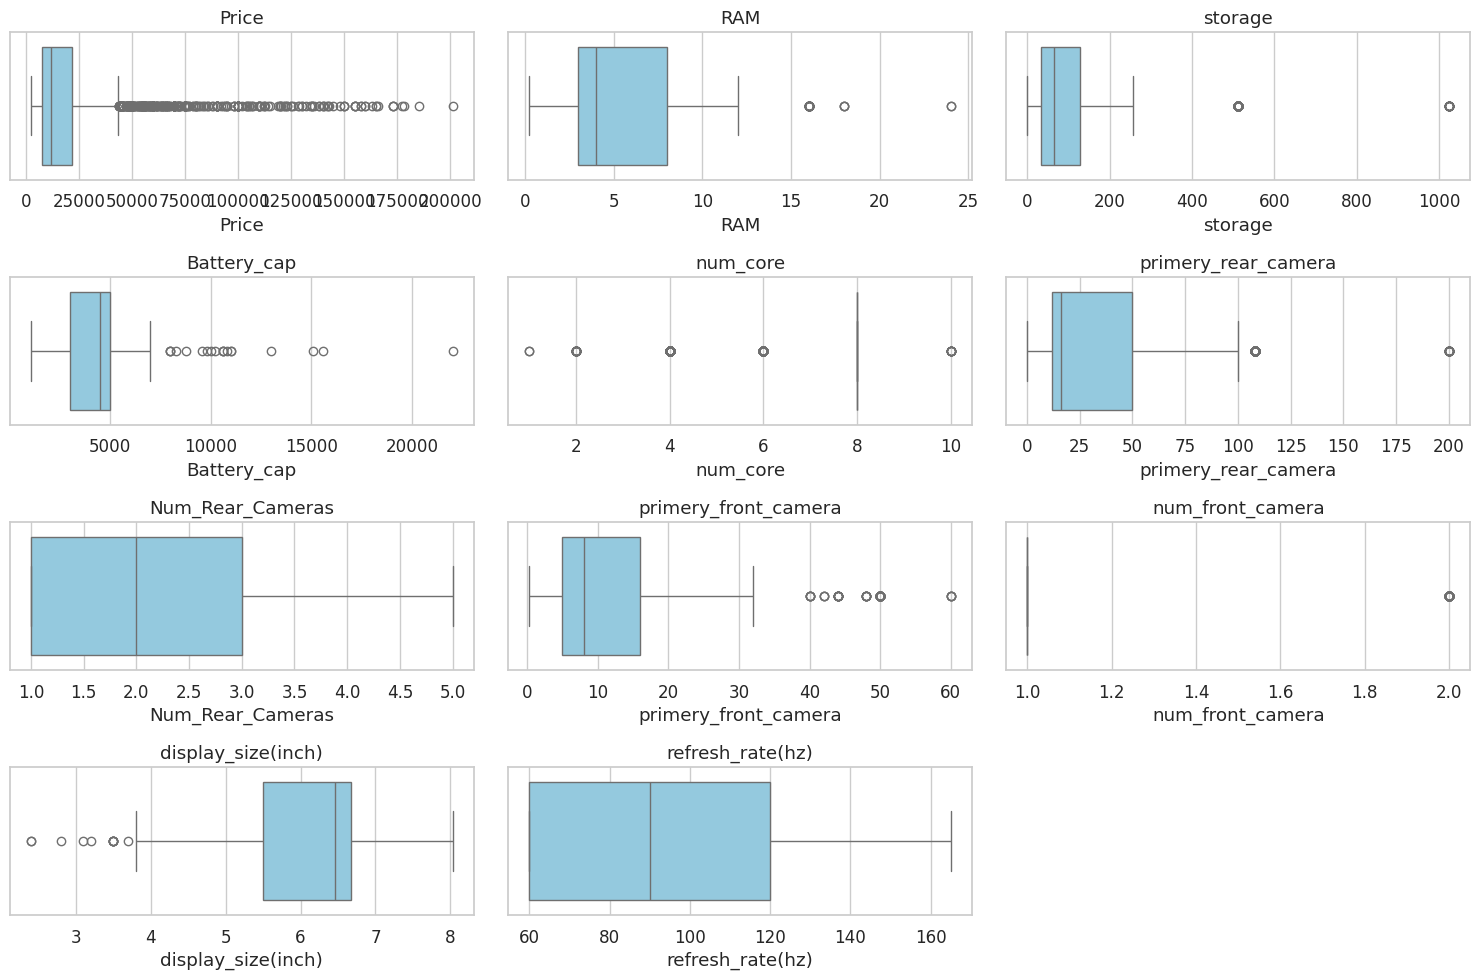

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom numerik utama
num_cols = [
    'Price', 'RAM', 'storage', 'Battery_cap', 'num_core',
    'primery_rear_camera', 'Num_Rear_Cameras',
    'primery_front_camera', 'num_front_camera',
    'display_size(inch)', 'refresh_rate(hz)'
]

# Plot boxplot untuk semua kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()


Karena dataset kami adalah data spesifikasi HP (real-world data):

Nilai seperti Price tinggi, Camera besar, atau Storage 1TB masih valid.

Jadi kamu tidak wajib menghapus atau winsorize,
cukup laporkan dan tunjukkan distribusinya.

# **uji parametrik menggunakan Pearson correlation**

In [39]:
#Pearson correlation

from scipy.stats import pearsonr

# Contoh: hubungan antara RAM dan Price
r, p_value = pearsonr(df['RAM'], df['Price'])
print(f"Pearson Correlation = {r:.3f}, p-value = {p_value:.3e}")


Pearson Correlation = 0.539, p-value = 3.714e-245


Kekuatan hubungan:

Nilai r = 0.539 menunjukkan hubungan positif sedang hingga kuat antara dua variabel (misalnya antara RAM dan Price).

Artinya: semakin besar nilai variabel pertama (misal RAM), maka cenderung semakin besar pula nilai variabel kedua (Price).

Arah hubungan:

Karena positif (+), maka hubungan searah: kenaikan satu variabel diikuti kenaikan variabel lainnya.

Signifikansi statistik:

p-value = 3.714e-245 ≪ 0.05 → sangat signifikan secara statistik.

Artinya, peluang hubungan ini terjadi hanya karena kebetulan hampir 0% — jadi hubungan ini valid dan nyata.

# *uji parametrik menggunakan T-Test*

In [40]:
from scipy.stats import ttest_ind
import numpy as np
import scipy.stats as stats

# Pisahkan dua grup
group_5g = df[df['has_5g'] == 1]['Price']
group_non_5g = df[df['has_5g'] == 0]['Price']

# Uji Welch’s t-test (unequal variances)
t_stat, p_val = ttest_ind(group_5g, group_non_5g, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_val)

# ---- Hitung Effect Size (Cohen’s d) ----
n1, n2 = len(group_5g), len(group_non_5g)
mean1, mean2 = np.mean(group_5g), np.mean(group_non_5g)
std1, std2 = np.std(group_5g, ddof=1), np.std(group_non_5g, ddof=1)
pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))
cohen_d = (mean1 - mean2) / pooled_std
print(f"Cohen’s d: {cohen_d:.3f}")

# ---- Hitung Confidence Interval ----
mean_diff = mean1 - mean2
se_diff = np.sqrt((std1**2/n1) + (std2**2/n2))
ci = stats.t.interval(0.95, df=min(n1, n2)-1, loc=mean_diff, scale=se_diff)
print(f"95% Confidence Interval: {ci}")


t-statistic: 21.820864119861756
p-value: 1.1388391708892913e-88
Cohen’s d: 1.096
95% Confidence Interval: (np.float64(21495.51010976442), np.float64(25743.697461142703))


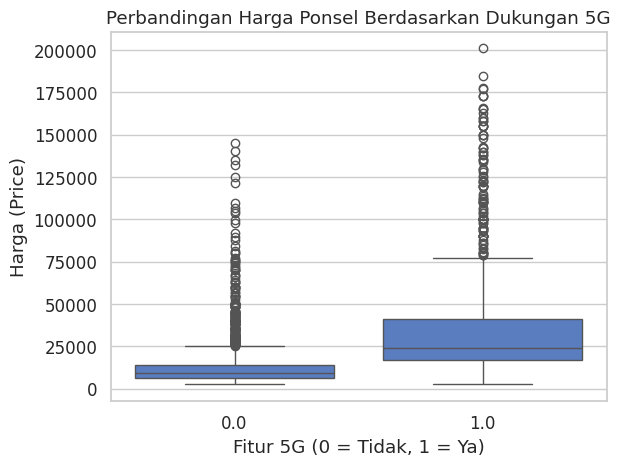

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='has_5g', y='Price', data=df)
plt.title('Perbandingan Harga Ponsel Berdasarkan Dukungan 5G')
plt.xlabel('Fitur 5G (0 = Tidak, 1 = Ya)')
plt.ylabel('Harga (Price)')
plt.show()


Berdasarkan boxplot di atas, terlihat bahwa ponsel yang memiliki fitur 5G cenderung memiliki harga yang lebih tinggi dibandingkan ponsel tanpa 5G.
Hal ini memperkuat hasil uji independent t-test sebelumnya, yang menunjukkan bahwa perbedaan harga antara kedua kelompok signifikan secara statistik (p < 0.05).

# Mann-Whitney U Test Non Parametrik


In [42]:
from scipy.stats import mannwhitneyu, norm
import numpy as np

# Pisahkan data berdasarkan dukungan 5G
price_5g = df[df['has_5g'] == 1]['Price']
price_non_5g = df[df['has_5g'] == 0]['Price']

# Uji Mann–Whitney U
stat, p = mannwhitneyu(price_5g, price_non_5g, alternative='two-sided')
print(f"Mann–Whitney U Statistic: {stat}")
print(f"p-value: {p}")

# ---- Hitung Effect Size (r) ----
n1, n2 = len(price_5g), len(price_non_5g)
mean_U = n1*n2/2
std_U = np.sqrt(n1*n2*(n1+n2+1)/12)
z = (stat - mean_U) / std_U
r = abs(z) / np.sqrt(n1 + n2)
print(f"Effect size (r): {r:.3f}")


Mann–Whitney U Statistic: 1977531.0
p-value: 8.526131814948588e-255
Effect size (r): 0.597


Berdasarkan uji Mann–Whitney U, terdapat perbedaan harga yang signifikan antara ponsel dengan dukungan 5G dan tanpa dukungan 5G (p < 0.05).
Ponsel dengan fitur 5G cenderung memiliki harga yang lebih tinggi.

# VISUALISASI DATA SETELAH DATA BERSIH

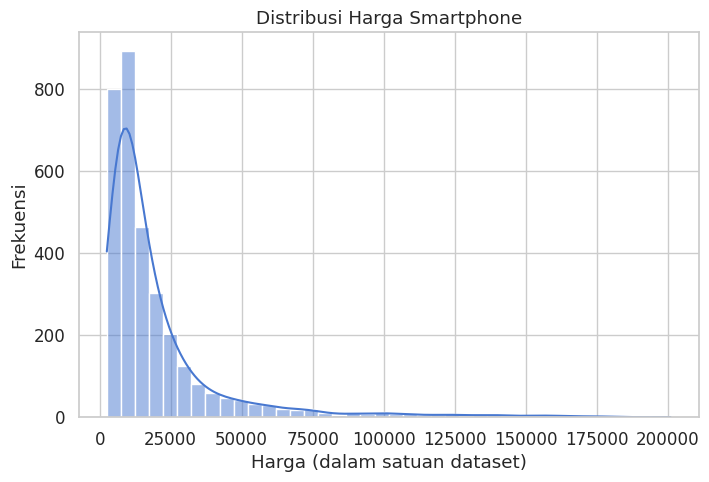

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=40, kde=True)
plt.title('Distribusi Harga Smartphone')
plt.xlabel('Harga (dalam satuan dataset)')
plt.ylabel('Frekuensi')
plt.show()

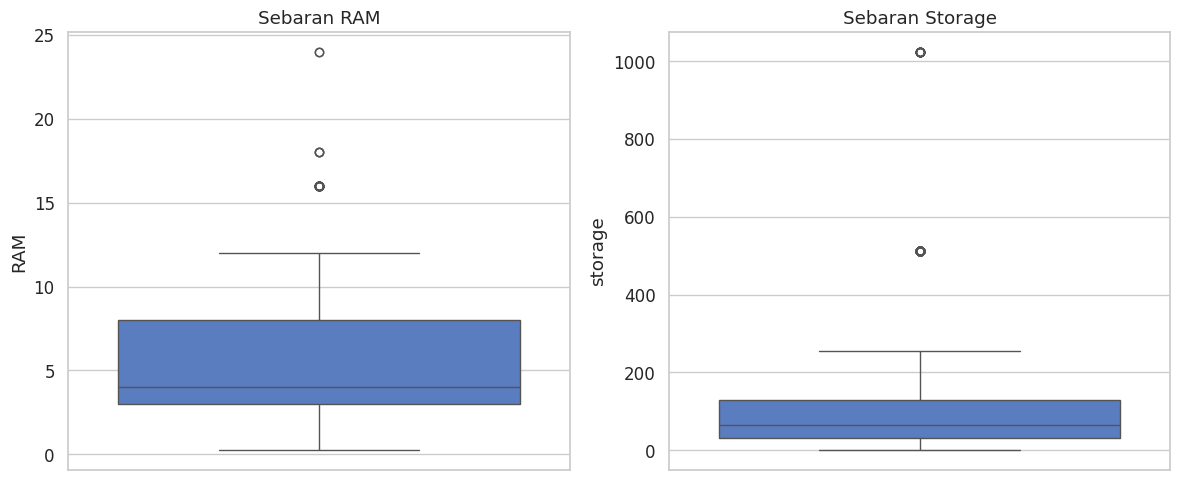

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(y='RAM', data=df, ax=axes[0])
axes[0].set_title('Sebaran RAM')

sns.boxplot(y='storage', data=df, ax=axes[1])
axes[1].set_title('Sebaran Storage')

plt.tight_layout()
plt.show()


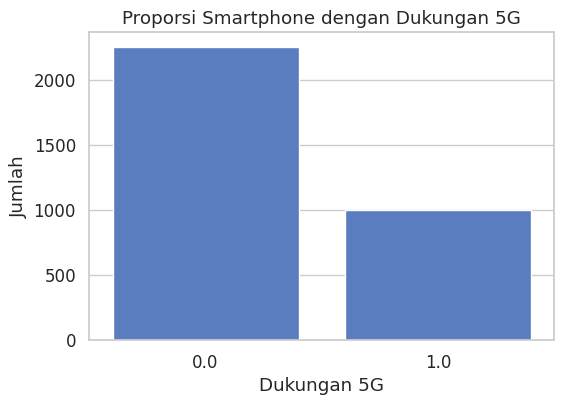

In [45]:
# --- 3️⃣ Bar Chart: Proporsi Smartphone dengan 5G ---
plt.figure(figsize=(6, 4))
sns.countplot(x='has_5g', data=df)
plt.title('Proporsi Smartphone dengan Dukungan 5G')
plt.xlabel('Dukungan 5G')
plt.ylabel('Jumlah')
plt.show()

# Alasan:
# Bar chart cocok untuk data kategorikal seperti fitur "Ya/Tidak".
# Insight:
# Dari proporsinya kita tahu apakah mayoritas ponsel dalam dataset sudah 5G atau belum.

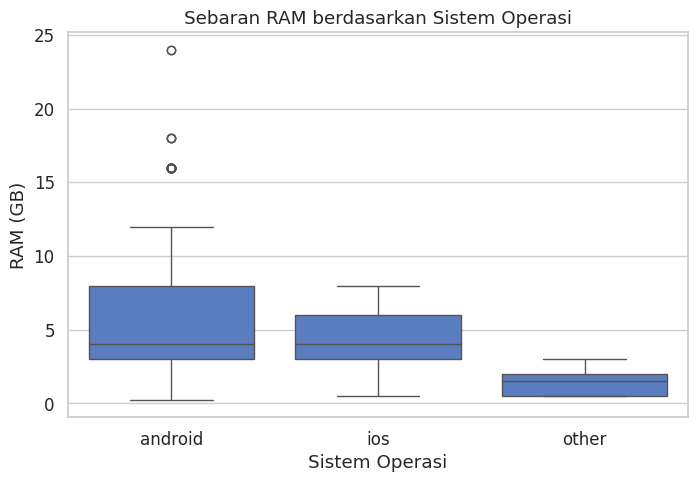

In [46]:
# Membuat kembali kolom OS berdasarkan kolom hasil encoding
df['OS'] = df[['OS_android', 'OS_ios', 'OS_other']].idxmax(axis=1)

# Hapus awalan 'OS_' agar lebih rapi
df['OS'] = df['OS'].str.replace('OS_', '')

# Visualisasi Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='OS', y='RAM', data=df)
plt.title('Sebaran RAM berdasarkan Sistem Operasi')
plt.xlabel('Sistem Operasi')
plt.ylabel('RAM (GB)')
plt.show()


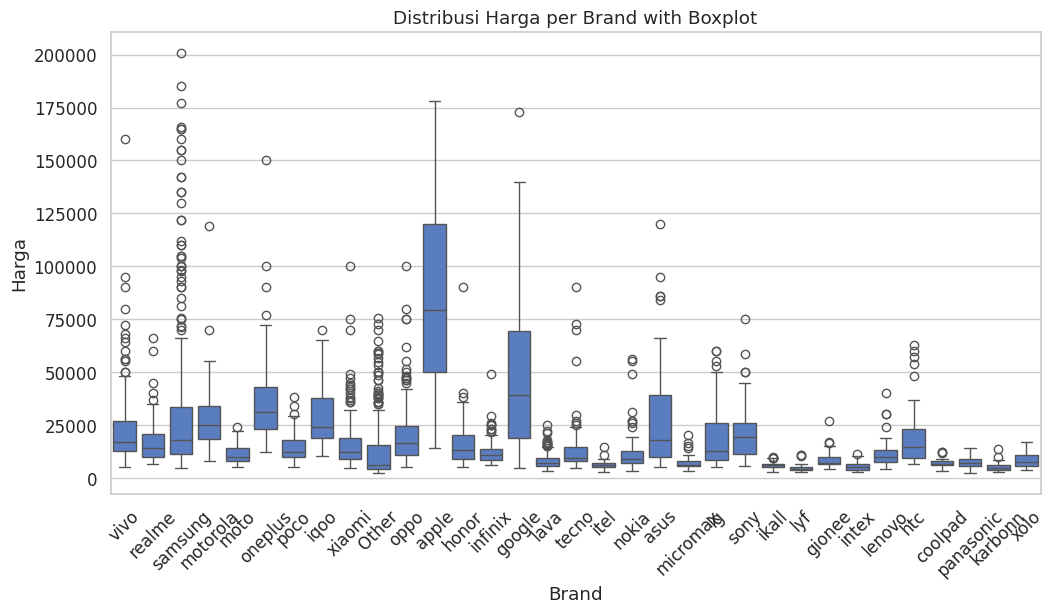

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Examples using existing columns
col_brand = 'brand_name'  # Use the original brand_name column before one-hot encoding for plotting
col_price = 'Price'
col_ram = 'RAM'      # RAM in GB
col_camera = 'primery_rear_camera'  # megapixels of the primary rear camera

# 1. Boxplot harga per brand -> lihat outlier dan distribusi
plt.figure(figsize=(12,6))
# Recreate the original 'brand_name' column for plotting purposes
df['brand_name'] = df[[col for col in df.columns if col.startswith('brand_name_')]].idxmax(axis=1).str.replace('brand_name_', '')
sns.boxplot(x=col_brand, y=col_price, data=df)
plt.xticks(rotation=45)
plt.title('Distribusi Harga per Brand with Boxplot')
plt.ylabel('Harga')
plt.xlabel('Brand')
plt.show()



/tmp/ipython-input-3093483822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


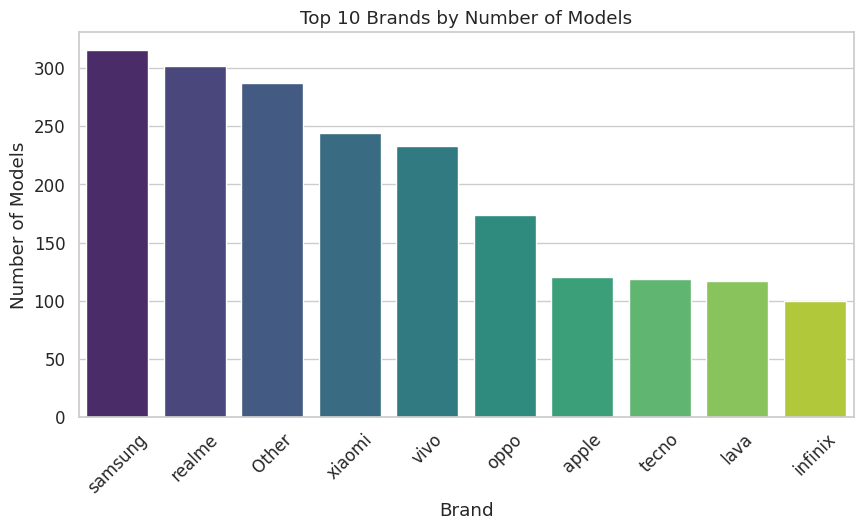

In [48]:
# 2. Bar chart jumlah model per brand
plt.figure(figsize=(10,5))
brand_counts = df[col_brand].value_counts().nlargest(10)  # top-10 brands
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Brands by Number of Models')
plt.ylabel('Number of Models')
plt.xlabel('Brand')
plt.show()



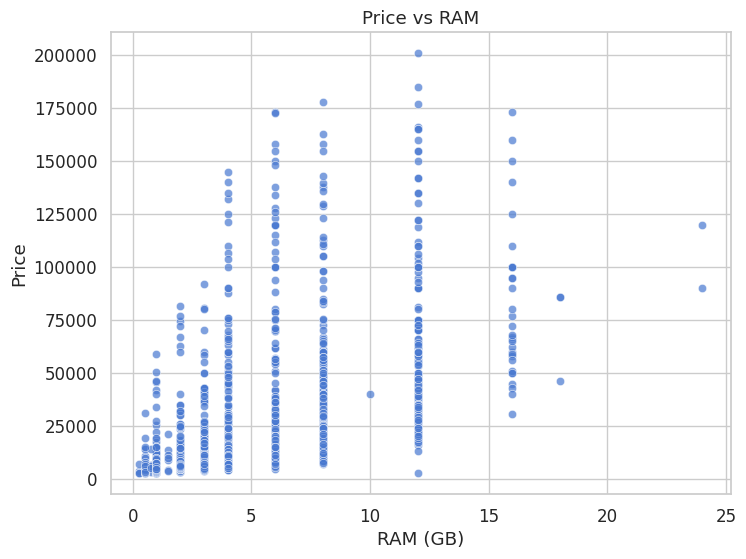

In [49]:
# 3. Harga vs RAM
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=col_ram, y=col_price, alpha=0.7)
plt.title('Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()



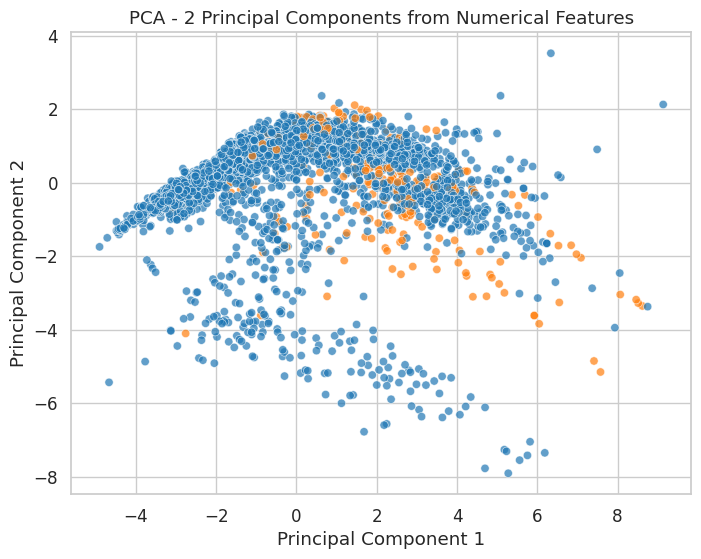

In [50]:
# 4. PCA 2 dimensions from numerical features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
# Ensure no missing values
df_num = df[numeric_cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

df_pca = df_num.copy()
df_pca['PC1'] = pcs[:,0]
df_pca['PC2'] = pcs[:,1]

# Drop the temporary 'brand_name' column before merging PCA results
df_temp = df.drop(columns=['brand_name'])

plt.figure(figsize=(8,6))
# Use the original index to align PCA results with brand names
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue=df_temp['brand_name_samsung'].loc[df_pca.index], legend=False, palette='tab10', alpha=0.7) # Using samsung brand as example hue
plt.title('PCA - 2 Principal Components from Numerical Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()




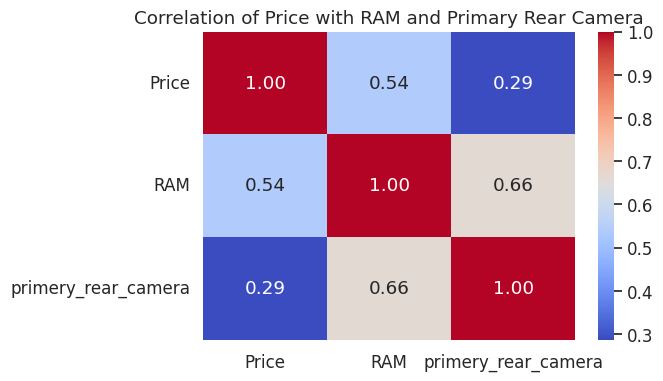

In [51]:
# 5. Heatmap of numerical features vs important features (example: correlation of price with RAM & camera)
plt.figure(figsize=(6,4))
sns.heatmap(df[[col_price, col_ram, col_camera]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Price with RAM and Primary Rear Camera')
plt.show()

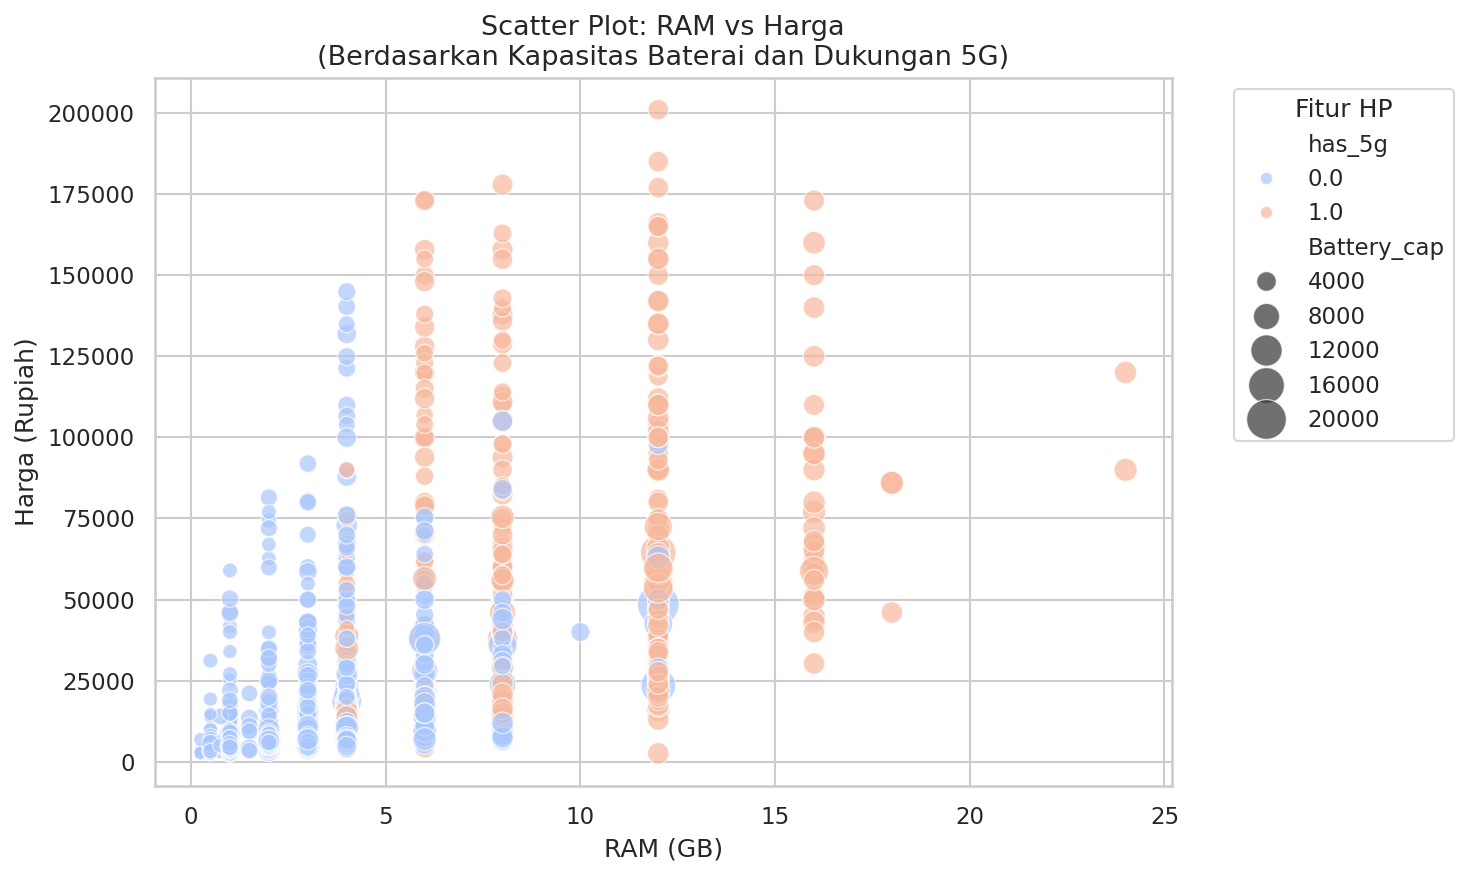

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur gaya visual agar modern dan bersih
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6), dpi=150)

# Scatter plot dengan estetika keren
sns.scatterplot(
    x='RAM',
    y='Price',
    hue='has_5g',
    size='Battery_cap',
    sizes=(40, 400),
    alpha=0.7,
    palette='coolwarm',
    data=df
)

plt.title("Scatter Plot: RAM vs Harga\n(Berdasarkan Kapasitas Baterai dan Dukungan 5G)", fontsize=13)
plt.xlabel("RAM (GB)")
plt.ylabel("Harga (Rupiah)")
plt.legend(title="Fitur HP", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
